In [1]:
import numpy as np
from quantum_perceptron.utils import plot_img_from_data, get_vector_from_int, get_int_from_vector
from quantum_perceptron.train import generate_dataset, PerceptronTrainer
from quantum_perceptron import Perceptron

# Generate Dataset

Generate dataset to train 4 qubit perceptron.

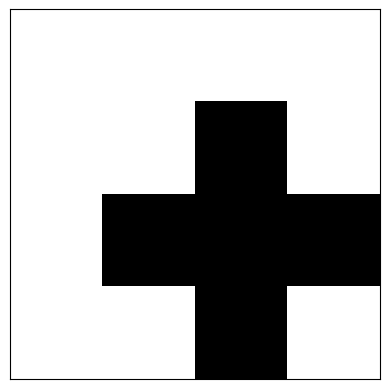

In [2]:
fixed_weight = 626
num_qubits = 4
plot_img_from_data(fixed_weight, num_qubits)

In [3]:
generate_dataset(num_qubits=num_qubits, fixed_weight=fixed_weight)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [19:38<00:00, 55.59it/s]

Number of positive samples: 274
Number of negative samples: 65262
Saved data to ./data/sample_space_qubits_4_fweight_626.txt
Saved training data to ./data/train_space_qubits_4_fweight_626.txt


# Perceptron Training

Train generated dataset with 4 qubit perceptron. We will initialize random weight and will train perceptron so that it gradually updates the weight to the `fixed_weight` with which the dataset is generated.

In [4]:
trainer = PerceptronTrainer(
    num_qubits=num_qubits,
    fixed_weight=fixed_weight,
    dataset_path="./data/train_space_qubits_4_fweight_626.txt"
)

wandb: Currently logged in as: ashutosh1919. Use `wandb login --relogin` to force relogin


Randomly initialized weight before training:


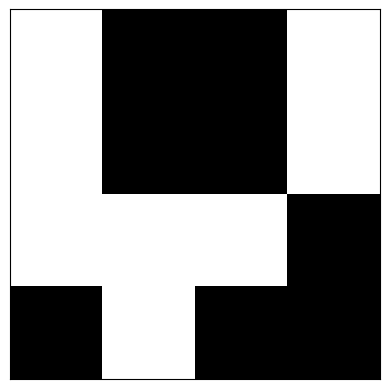

In [5]:
print("Randomly initialized weight before training:")
plot_img_from_data(trainer.weight_variable, num_qubits)

In [6]:
trainer.train(num_epochs=10)

 32%|████████████████████████████████████▋                                                                               | 963/3050 [00:35<01:17, 26.77it/s]

Training converged at step: 28414


Final weight after training:


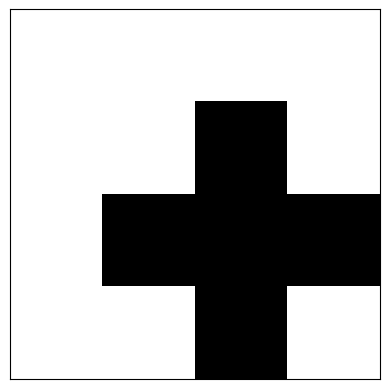

In [7]:
print("Final weight after training:")
plot_img_from_data(trainer.weight_variable, num_qubits)

Text(0, 0.5, 'Fidelity Similarity with Actual Weight')

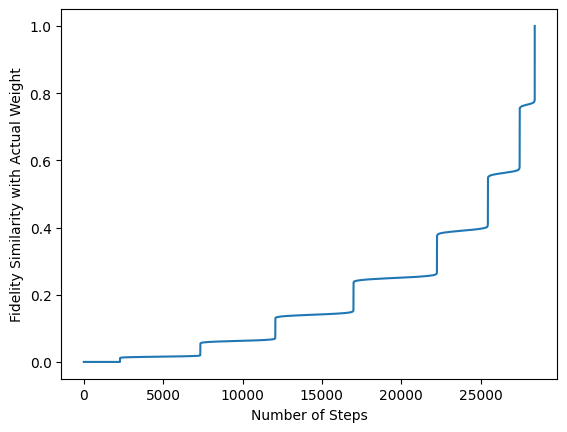

In [11]:
import matplotlib.pyplot as plt

plt.plot(list(range(trainer.num_steps)), sorted(trainer.accumulate_loss))
plt.xlabel("Number of Steps")
plt.ylabel("Fidelity Similarity with Actual Weight")